**This Notebook uses sample code from DDC to a single file which shows how to transform DWG files and Revit files to dataframes and then apply analytics (with 2050 Materials APIs)**


Import libraries and turn revit file into dataframe

In [171]:
# from google.colab import drive
# drive.mount('/content/drive')
#
# !ls /content/drive/
import os
current_path = os.getcwd()
print(current_path)

/Users/phanoshadjikyriakou/DDC_2050M/DDC_pipelines


In [172]:
import os, subprocess, pandas as pd, time
# Folder where Revit exporter is located
path_conv = "/Users/phanoshadjikyriakou/DDC_2050M/DDC_DWG_Converter/datadrivenlibs/"
# The adress of the Revit file on computer
file_path = "/Users/phanoshadjikyriakou/DDC_2050M/RVT_projects/2022 rstadvancedsampleproject_rvt.csv"
file_path_simple = "/Users/phanoshadjikyriakou/DDC_2050M/RVT_projects/rac_basic_sample_project.csv"

# Convert a Revit project to an open format
# process = subprocess.Popen([os.path.join(path_conv, "RvtExporter.exe"), file_path], cwd = path_conv)
# process.wait() # waiting for process to be completed

# Read the converted Excel file

df = pd.read_csv(file_path_simple, low_memory=False)
df.head(5)

,Unnamed: 0,Family,Type,Host,Level,Moves With Nearby Elements,Offset from Host,Design Option,Type Name,Category,...,Automatically Embed,Curtain Panel,Join Condition,Adjust for Mullion Size,Layout,Border 1 Type,Border 2 Type,Interior Type,Rebar Cover - Exterior Face,Rebar Cover - Interior Face
0,950367,M_RPC Beetle,M_RPC Beetle,Surface,Level 1,No,600.0,NaN,M_RPC Beetle,OST_Entourage,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,954641,YinYin,YinYin,Level : Level 1 Living Rm.,Level 1 Living Rm.,No,0.0,NaN,YinYin,OST_Entourage,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,954992,YinYin,YinYin,Floor : Generic 300,Level 2,No,0.0,NaN,YinYin,OST_Entourage,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,955125,YinYin,YinYin,Floor : Insitu Concrete 225mm,Level 2,No,0.0,NaN,YinYin,OST_Entourage,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,954779,Alex,Alex,Level : Ceiling,Ceiling,No,-150.0,NaN,Alex,OST_Entourage,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Have a look at the Type name and volume of compoenents in the model

In [173]:
list(df.columns)

['Unnamed: 0',
 'Family',
 'Type',
 'Host',
 'Level',
 'Moves With Nearby Elements',
 'Offset from Host',
 'Design Option',
 'Type Name',
 'Category',
 'Family Name',
 'Family and Type',
 'Host Id',
 'Type Id',
 'Phase Created',
 'Phase Demolished',
 'Height',
 'Render Appearance',
 'Render Appearance Properties',
 'Elevation from Level',
 'Assembly Code',
 'Assembly Description',
 'Description',
 'OmniClass Number',
 'OmniClass Title',
 'Type Comments',
 'Type Mark',
 'Area',
 'Volume',
 'Depth',
 'Width',
 'Power connection point indicator on/off',
 'Voltage',
 'Manufacturer',
 'Model',
 'URL',
 'Consideration',
 'Door swing line on/off',
 'Joinery cut line on/off',
 'Control Panel',
 'Digital Plate',
 'Door',
 'Service Panel',
 'Switch',
 'Tumble Dryer',
 'Vents',
 'Water Container',
 'Wheels',
 'Face depth',
 'Face height',
 'Face width',
 'Considerations',
 'Frame',
 'Grease Filter',
 'Lighting',
 'Logo',
 'Rangehood',
 'Body depth',
 'Body height',
 'Body width',
 'Fitting',
 'Fi

In [174]:

# Write parameters into the variables
df['Type Name and Family Name'] = 'Type Name: ' + df['Type Name'] + ', Family Name: ' + df['Family Name']
parameter_1 = 'Type Name and Family Name'
# parameter_1 = 'Type Name'
parameter_2 = 'Volume'

#Summing the entire project for one parameter and summing values in another parameter
# Remove units from the volume column
df[parameter_2] = df[parameter_2].str.extract(r'(\d+\.?\d*)')[0].astype(float)

# Summing the entire project for one parameter and summing values in another parameter
dfg = df.groupby(parameter_1)[parameter_2].sum()
dfg

Type Name and Family Name
Type Name: 01 Cotton, Family Name: Bathtub-TOTO-Nexus-FBF794S      0.26
Type Name: 0810mm, Family Name: M_TV - Flat Screen                 0.05
Type Name: 1180 x 1170mm, Family Name: M_Skylight                  0.08
Type Name: 150mm Foundation Slab, Family Name: Foundation Slab    18.51
Type Name: 1730 x 2134mm, Family Name: M_Double-Flush              0.21
                                                                  ...  
Type Name: fire place hang, Family Name: fire place hang           0.55
Type Name: hood enclosure, Family Name: hood enclosure             0.04
Type Name: small, Family Name: M_Shower Stall-2D                   0.00
Type Name: wardrobe, Family Name: wardrobe1                        1.94
Type Name: wardrobe, Family Name: wardrobe2                        1.94
Name: Volume, Length: 85, dtype: float64

In [175]:
dfg.sum()

3629.11

Save those as a bill of materials and plot in a bar chart

In [176]:
#Group the project by the number of elements in the group
dfcc = df.groupby(parameter_1)[parameter_2].count()
dfcc

Type Name and Family Name
Type Name: 01 Cotton, Family Name: Bathtub-TOTO-Nexus-FBF794S     1
Type Name: 0810mm, Family Name: M_TV - Flat Screen                1
Type Name: 1180 x 1170mm, Family Name: M_Skylight                 2
Type Name: 150mm Foundation Slab, Family Name: Foundation Slab    1
Type Name: 1730 x 2134mm, Family Name: M_Double-Flush             1
                                                                 ..
Type Name: fire place hang, Family Name: fire place hang          1
Type Name: hood enclosure, Family Name: hood enclosure            1
Type Name: small, Family Name: M_Shower Stall-2D                  0
Type Name: wardrobe, Family Name: wardrobe1                       1
Type Name: wardrobe, Family Name: wardrobe2                       1
Name: Volume, Length: 85, dtype: int64

Filter data by categories and plot

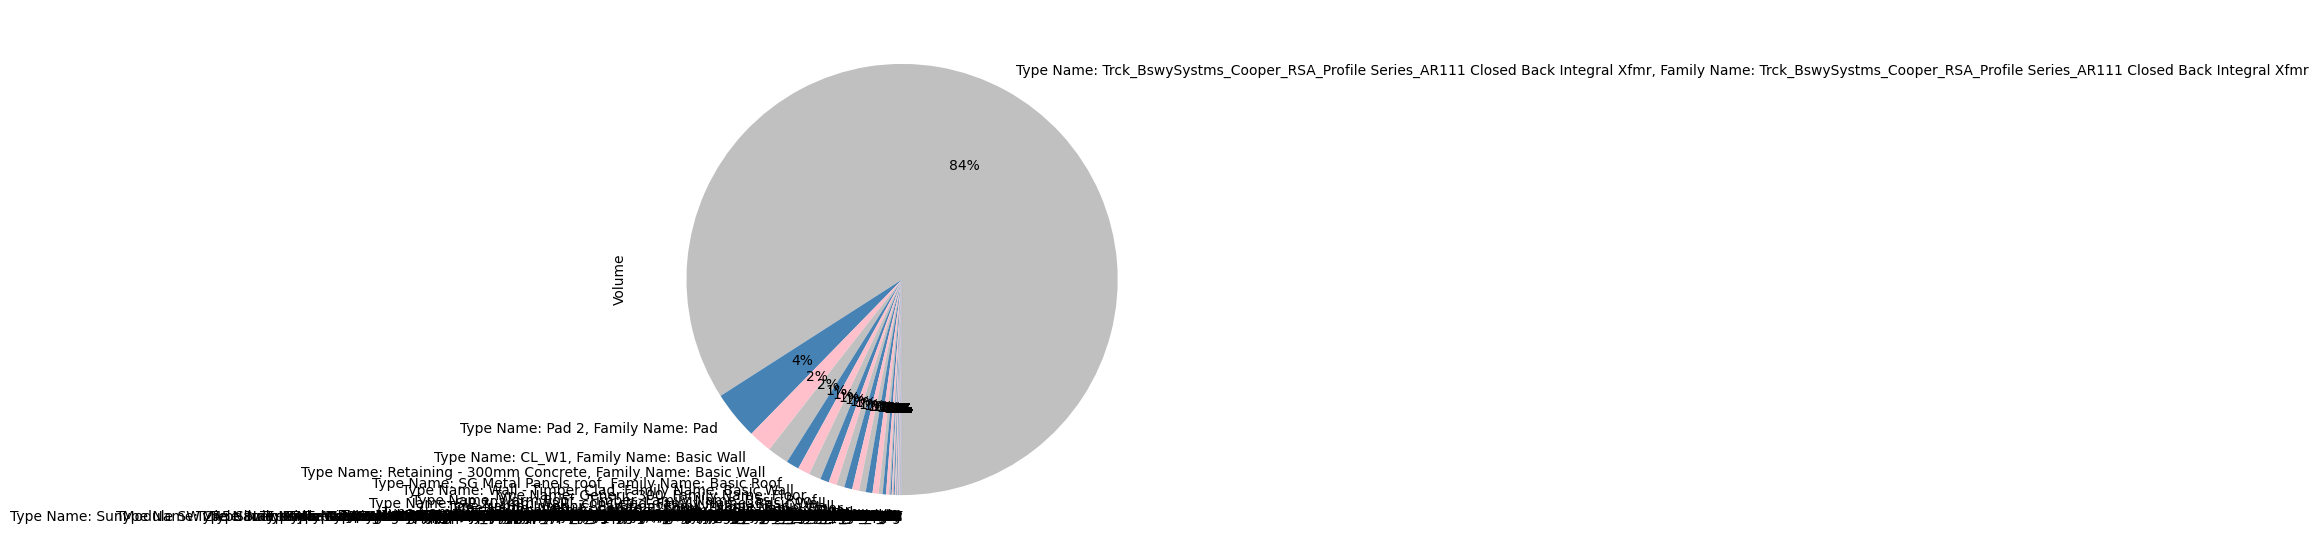

In [192]:
import matplotlib.pyplot as plt

colors_n1 = ['silver', 'steelblue', 'pink']
dfg = dfg.sort_values(ascending=False)
plot_n1 = dfg.plot(kind='pie', figsize=(7, 7), autopct='%1.0f%%',colors=colors_n1, startangle=270)

AttributeError: 'Series' object has no attribute 'columns'

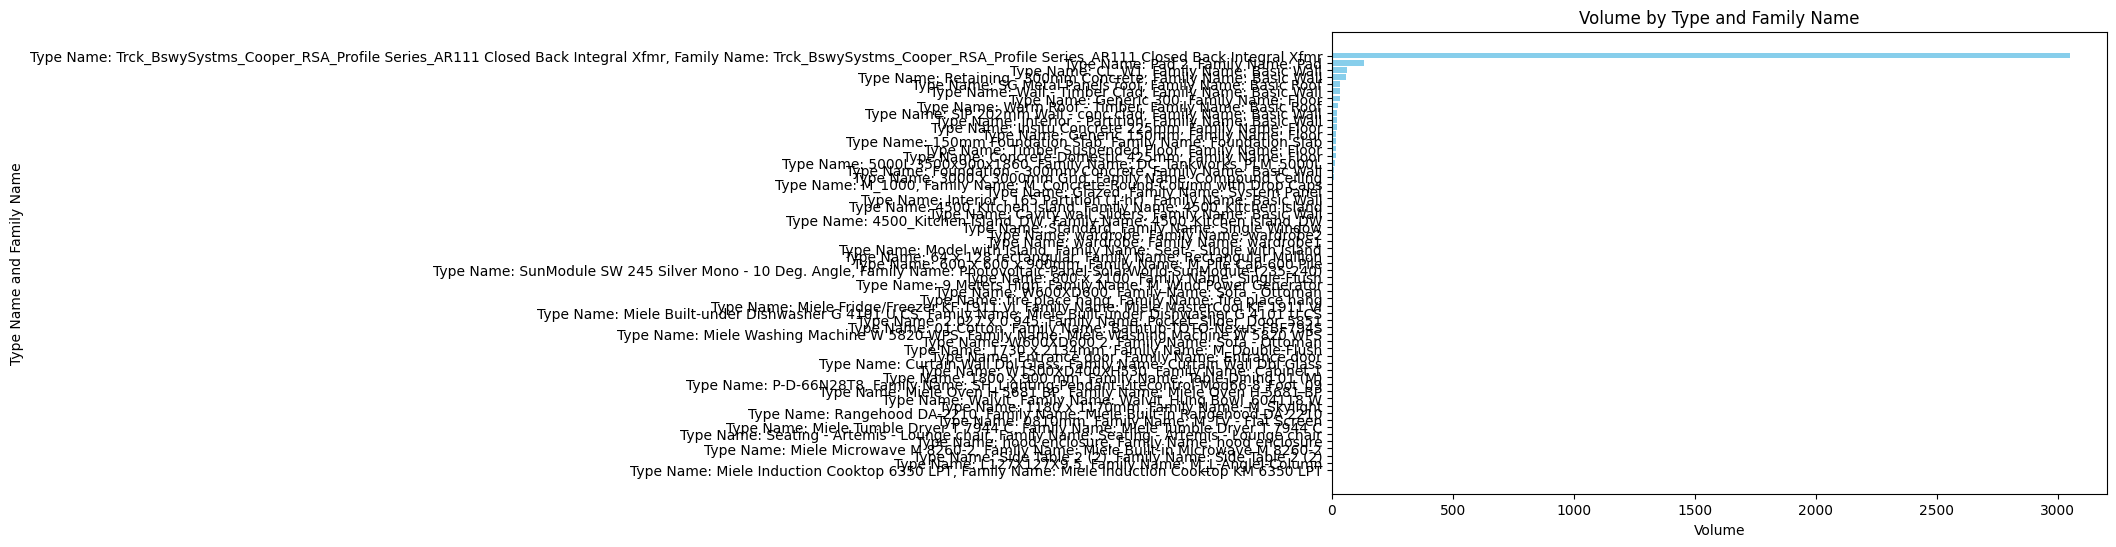

In [188]:
# Visualizing data from the Dataframe with only non zero values
dfg_plot = pd.DataFrame(dfg)
dfg_plot = dfg_plot[dfg_plot['Volume'] > 0]
# Sort values in descending order
dfg_plot = dfg_plot.sort_values(by='Volume', ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.barh(dfg_plot.index, dfg_plot['Volume'], color='skyblue')
plt.xlabel('Volume')
plt.ylabel('Type Name and Family Name')
plt.title('Volume by Type and Family Name')
plt.gca().invert_yaxis()  # To display the highest values at the top
plt.show()

In [183]:
dfg_plot

,Volume
Type Name and Family Name,
"Type Name: Trck_BswySystms_Cooper_RSA_Profile Series_AR111 Closed Back Integral Xfmr, Family Name: Trck_BswySystms_Cooper_RSA_Profile Series_AR111 Closed Back Integral Xfmr",3051.20
"Type Name: Pad 2, Family Name: Pad",131.03
"Type Name: CL_W1, Family Name: Basic Wall",63.75
"Type Name: Retaining - 300mm Concrete, Family Name: Basic Wall",57.93
"Type Name: SG Metal Panels roof, Family Name: Basic Roof",34.97
"Type Name: Wall - Timber Clad, Family Name: Basic Wall",32.92
"Type Name: Generic 300, Family Name: Floor",32.85
"Type Name: Warm Roof - Timber, Family Name: Basic Roof",23.93
"Type Name: SIP 202mm Wall - conc clad, Family Name: Basic Wall",21.95


In [ ]:
#Let's check if the parameters are filled in
import missingno as msno
figm2 = msno.bar(df.iloc[: , 40:80])